# Project 4 GA-DSI

In [1009]:
import numpy as np
import pandas as pd
import seaborn as sns

import requests
import time
from bs4 import BeautifulSoup
from wordcloud import (WordCloud, get_single_color_func)
import matplotlib.pyplot as plt
import pickle as pk
import re

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression, LassoCV, LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

%matplotlib inline
sns.set_palette("husl")

In [442]:
f = open('./data/total.pickle','rb')
dft = pickle.load(f)

In [444]:
dft

,company,country,description,location,review,salary,star,title
10,UMeKang,Singapore,"Use all available data, undertaking data disco...",Singapore,None,"$9,000 - $11,000 a month",None,Data Scientist
3,Cresco Data Pte Ltd,Singapore,Data Scientist Duties:. We are looking for a D...,Tanjong Pagar,None,"$3,500 - $4,500 a month",None,Data Scientist
8,iKas International (Asia) Pte Ltd,Singapore,"Using data modeling, linear regression, statis...",Singapore,None,"$7,000 - $9,000 a month",None,Data Scientist
6,Vault Dragon,Singapore,Assist the Data Scientist in deploying Machine...,Singapore,None,"$4,000 - $6,000 a month",None,Data Engineer
5,TSA Solutions,Singapore,Data Scientist - Summary*. Bachelor in degree ...,Pasir Panjang,None,"$4,200 a month",None,Data Scientist
4,EkkBaz.com,Singapore,We are looking for a Data Scientist that will ...,Ang Mo Kio,None,"$1,000 - $2,000 a month",None,Data Scientist Intern
10,6Estates Pte Ltd,Singapore,Assist to organise unstructured data on websit...,Singapore,None,"$1,000 a month",None,Data Crawling Engineer Intern
5,Transforma,Singapore,Develop and implement algorithms for 3D recons...,Singapore,None,"$3,500 - $5,500 a month",None,Robot Software Engineer - Image Processing
10,Shentilium Technologies,Singapore,"Perform ETL, data cleaning and data crowdsourc...",Singapore,None,"$1,000 a month",None,Data Visualization and Wrangling Intern
10,TSA Solutions,Singapore,Knowledge of SQL for retrieving data. Support ...,Singapore,None,"$3,000 - $4,300 a month",None,Data Analyst


In [445]:
dft.reset_index(drop=True, inplace=True)

In [447]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4343 entries, 0 to 4342
Data columns (total 8 columns):
company        4335 non-null object
country        4343 non-null object
description    4343 non-null object
location       4343 non-null object
review         2040 non-null object
salary         4343 non-null object
star           2040 non-null object
title          4343 non-null object
dtypes: object(8)
memory usage: 271.5+ KB


### Dataframe Cleaning + EDA

In [450]:
dft

,company,country,description,location,review,salary,star,title
0,UMeKang,Singapore,"Use all available data, undertaking data disco...",Singapore,None,"$9,000 - $11,000 a month",None,Data Scientist
1,Cresco Data Pte Ltd,Singapore,Data Scientist Duties:. We are looking for a D...,Tanjong Pagar,None,"$3,500 - $4,500 a month",None,Data Scientist
2,iKas International (Asia) Pte Ltd,Singapore,"Using data modeling, linear regression, statis...",Singapore,None,"$7,000 - $9,000 a month",None,Data Scientist
3,Vault Dragon,Singapore,Assist the Data Scientist in deploying Machine...,Singapore,None,"$4,000 - $6,000 a month",None,Data Engineer
4,TSA Solutions,Singapore,Data Scientist - Summary*. Bachelor in degree ...,Pasir Panjang,None,"$4,200 a month",None,Data Scientist
5,EkkBaz.com,Singapore,We are looking for a Data Scientist that will ...,Ang Mo Kio,None,"$1,000 - $2,000 a month",None,Data Scientist Intern
6,6Estates Pte Ltd,Singapore,Assist to organise unstructured data on websit...,Singapore,None,"$1,000 a month",None,Data Crawling Engineer Intern
7,Transforma,Singapore,Develop and implement algorithms for 3D recons...,Singapore,None,"$3,500 - $5,500 a month",None,Robot Software Engineer - Image Processing
8,Shentilium Technologies,Singapore,"Perform ETL, data cleaning and data crowdsourc...",Singapore,None,"$1,000 a month",None,Data Visualization and Wrangling Intern
9,TSA Solutions,Singapore,Knowledge of SQL for retrieving data. Support ...,Singapore,None,"$3,000 - $4,300 a month",None,Data Analyst


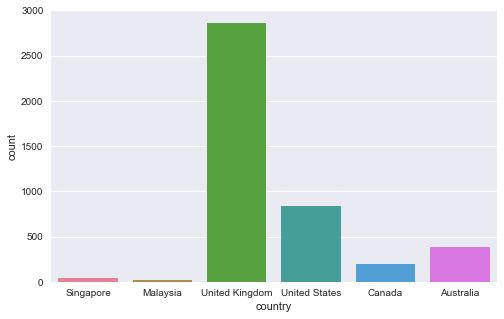

In [567]:
fig = plt.figure(figsize=(8, 5))
sns.countplot(dft['country'])

In [373]:
def get_standardized_salary(salary_string):
    '''parses out salary info from salary column, giving min, average and max ranges for each job'''
    if salary_string:
        if re.findall('(.*) a year', salary_string):
            matches = re.findall('([0-9]+,[0-9]+)', salary_string)
            return min([float(salary.replace(',', '')) for salary in matches]), \
                    np.mean([float(salary.replace(',', '')) for salary in matches]), \
                    max([float(salary.replace(',', '')) for salary in matches])
        elif re.findall('(.*) a month', salary_string):
            matches = re.findall('([0-9]+,[0-9]+|[0-9]+)', salary_string)
            return min([float(salary.replace(',', '')) for salary in matches])*12, \
                    np.mean([float(salary.replace(',', '')) for salary in matches])*12, \
                    max([float(salary.replace(',', '')) for salary in matches])*12
        elif re.findall('(.*) a week', salary_string):
            matches = re.findall('([0-9]+,[0-9]+|[0-9]+)', salary_string)
            return min([float(salary.replace(',', '')) for salary in matches])*52, \
                    np.mean([float(salary.replace(',', '')) for salary in matches])*52, \
                    max([float(salary.replace(',', '')) for salary in matches])*52
        elif re.findall('(.*) a day', salary_string):
            matches = re.findall('([0-9]+,[0-9]+|[0-9]+)', salary_string)
            return min([float(salary.replace(',', '')) for salary in matches])*5*52, \
                    np.mean([float(salary.replace(',', '')) for salary in matches])*5*52, \
                    max([float(salary.replace(',', '')) for salary in matches])*5*52
        elif re.findall('(.*) an hour', salary_string):
            matches = re.findall('([0-9]+\.[0-9]+|[0-9]+)', salary_string)
            return min([float(salary.replace(',', '')) for salary in matches])*8*5*52, \
                    np.mean([float(salary.replace(',', '')) for salary in matches])*8*5*52, \
                    max([float(salary.replace(',', '')) for salary in matches])*8*5*52
    else:
        return None


In [451]:
salrange = []
for item in range(len(dft['salary'])):
    sal = get_standardized_salary(dft['salary'][item])
    salrange.append(sal)
r = pd.DataFrame(salrange, columns=['min_sal','avg_sal','max_sal'])
dft = pd.concat([dft,r],axis=1)

In [453]:
dft

,company,country,description,location,review,salary,star,title,min_sal,avg_sal,max_sal
0,UMeKang,Singapore,"Use all available data, undertaking data disco...",Singapore,None,"$9,000 - $11,000 a month",None,Data Scientist,108000.0,120000.0,132000.0
1,Cresco Data Pte Ltd,Singapore,Data Scientist Duties:. We are looking for a D...,Tanjong Pagar,None,"$3,500 - $4,500 a month",None,Data Scientist,42000.0,48000.0,54000.0
2,iKas International (Asia) Pte Ltd,Singapore,"Using data modeling, linear regression, statis...",Singapore,None,"$7,000 - $9,000 a month",None,Data Scientist,84000.0,96000.0,108000.0
3,Vault Dragon,Singapore,Assist the Data Scientist in deploying Machine...,Singapore,None,"$4,000 - $6,000 a month",None,Data Engineer,48000.0,60000.0,72000.0
4,TSA Solutions,Singapore,Data Scientist - Summary*. Bachelor in degree ...,Pasir Panjang,None,"$4,200 a month",None,Data Scientist,50400.0,50400.0,50400.0
5,EkkBaz.com,Singapore,We are looking for a Data Scientist that will ...,Ang Mo Kio,None,"$1,000 - $2,000 a month",None,Data Scientist Intern,12000.0,18000.0,24000.0
6,6Estates Pte Ltd,Singapore,Assist to organise unstructured data on websit...,Singapore,None,"$1,000 a month",None,Data Crawling Engineer Intern,12000.0,12000.0,12000.0
7,Transforma,Singapore,Develop and implement algorithms for 3D recons...,Singapore,None,"$3,500 - $5,500 a month",None,Robot Software Engineer - Image Processing,42000.0,54000.0,66000.0
8,Shentilium Technologies,Singapore,"Perform ETL, data cleaning and data crowdsourc...",Singapore,None,"$1,000 a month",None,Data Visualization and Wrangling Intern,12000.0,12000.0,12000.0
9,TSA Solutions,Singapore,Knowledge of SQL for retrieving data. Support ...,Singapore,None,"$3,000 - $4,300 a month",None,Data Analyst,36000.0,43800.0,51600.0


<div class="alert alert-block alert-info">
I now have min, avg and max salary for each job, but they are in their respective local currencies. Since I am comparing across countries, a common denomination should be used. I chose the greenback for comparison. 
</div>

In [454]:
from forex_python.converter import CurrencyRates
c = CurrencyRates()

In [455]:
country_cur = {'Singapore':'SGD','United Kingdom':'GBP','Australia':'AUD','Hong Kong':'HKD','United States':'USD','Malaysia':'MYR','Canada':'CAD'}

In [457]:
conv = c.get_rates('USD')
conv

{u'AUD': 1.2853,
 u'BGN': 1.663,
 u'BRL': 3.2329,
 u'CAD': 1.2648,
 u'CHF': 0.98742,
 u'CNY': 6.634,
 u'CZK': 21.752,
 u'DKK': 6.3288,
 u'EUR': 0.85027,
 u'GBP': 0.75931,
 u'HKD': 7.8057,
 u'HRK': 6.3881,
 u'HUF': 262.33,
 u'IDR': 13551.0,
 u'ILS': 3.5017,
 u'INR': 65.113,
 u'JPY': 113.89,
 u'KRW': 1129.0,
 u'MXN': 19.117,
 u'MYR': 4.2385,
 u'NOK': 7.9826,
 u'NZD': 1.4461,
 u'PHP': 51.697,
 u'PLN': 3.6054,
 u'RON': 3.9123,
 u'RUB': 57.486,
 u'SEK': 8.203,
 u'SGD': 1.3624,
 u'THB': 33.19,
 u'TRY': 3.72,
 u'ZAR': 13.723}

In [459]:
min_salary = []
avg_salary = []
max_salary = []
for val in range(len(dft['min_sal'])):
    if country_cur[dft['country'][val]] == 'USD':
        min_salary.append(dft['min_sal'][val])
    else:
        min_salary.append(1. / conv[country_cur[dft['country'][val]]] * dft['min_sal'][val])
        
for val in range(len(dft['avg_sal'])):
    if country_cur[dft['country'][val]] == 'USD':
        avg_salary.append(dft['avg_sal'][val])
    else:
        avg_salary.append(1. / conv[country_cur[dft['country'][val]]] * dft['avg_sal'][val])
        
for val in range(len(dft['max_sal'])):
    if country_cur[dft['country'][val]] == 'USD':
        max_salary.append(dft['max_sal'][val])
    else:
        max_salary.append(1. / conv[country_cur[dft['country'][val]]] * dft['max_sal'][val])
        

In [460]:
dft = pd.concat([dft, pd.DataFrame({'min_salary': min_salary, 'max_salary': max_salary, 'avg_salary': avg_salary})], axis=1)

In [461]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4343 entries, 0 to 4342
Data columns (total 14 columns):
company        4335 non-null object
country        4343 non-null object
description    4343 non-null object
location       4343 non-null object
review         2040 non-null object
salary         4343 non-null object
star           2040 non-null object
title          4343 non-null object
min_sal        4343 non-null float64
avg_sal        4343 non-null float64
max_sal        4343 non-null float64
avg_salary     4343 non-null float64
max_salary     4343 non-null float64
min_salary     4343 non-null float64
dtypes: float64(6), object(8)
memory usage: 475.1+ KB


### More data cleaning

In [708]:
# Fill rows without reviews to zero
dft['review'].fillna(0, inplace=True)
dft['review'] = dft['review'].astype(float)

# Fill rows without stars to zero
dft['star'].fillna(0, inplace=True)
dft['star'] = dft['star'].astype(float)

(10, 600)

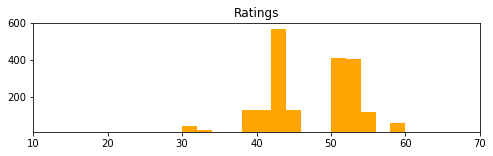

In [528]:
fig = plt.figure(figsize=(8, 2))
ax = plt.gca()
plt.hist(dft['star'], bins=30, color='orange')
plt.title("Ratings")
ax.set_xlim([10, 70])
ax.set_ylim([10, 600])

In [531]:
dft[dft['company'].isnull()==True]

,company,country,description,location,review,salary,star,title,min_sal,avg_sal,max_sal,avg_salary,max_salary,min_salary
1067,None,United Kingdom,Industry Profiles are designed to offer client...,Manchester,0,"£20,000 a year",0.0,Associate Research Analyst (Six Month Fixed Term),20000.0,20000.0,20000.0,26339.703152,26339.703152,26339.703152
1625,None,United Kingdom,Analyst team based in Leeds. Please note that ...,Yorkshire,0,"£40,000 a year",0.0,TPP - Graduate Analyst (Arabic or Mandarin spe...,40000.0,40000.0,40000.0,52679.406303,52679.406303,52679.406303
1660,None,United Kingdom,"Analytical experience, with high aptitude for ...",Leeds,0,"£30,000 - £38,000 a year",0.0,Credit Risk Modelling Analyst,30000.0,34000.0,38000.0,44777.495358,50045.435988,39509.554727
1917,None,United Kingdom,Analytical skills and the ability to manipulat...,Coventry,0,"£21,000 a year",0.0,Energy Analyst - Utilities,21000.0,21000.0,21000.0,27656.688309,27656.688309,27656.688309
2325,None,United Kingdom,Our client is looking for a Data Analyst to jo...,Margate,0,"£20,000 - £25,000 a year",0.0,Data Analyst (Property analysis),20000.0,22500.0,25000.0,29632.166045,32924.628939,26339.703152
2350,None,United Kingdom,"Our client, a leading local employer, seeks an...",Chelmsford,0,"£40,000 - £48,000 a year",0.0,Data Protection Analyst,40000.0,44000.0,48000.0,57947.346933,63215.287564,52679.406303
2629,None,United Kingdom,Working knowledge of Product Data Management (...,Hertfordshire,0,"£40,000 - £50,000 a year",0.0,Mechanical Design Engineer,40000.0,45000.0,50000.0,59264.332091,65849.257879,52679.406303
2767,None,United Kingdom,Imperial UK are looking for a bright Graduate ...,Derby,0,"£21,000 a year",0.0,Data Analyst,21000.0,21000.0,21000.0,27656.688309,27656.688309,27656.688309


<div class="alert alert-block alert-info">
There were eight rows without a company name. Decided not to drop them as company name will not be used as a feature for the model, but they contain relevant salary information
</div>

### Visualising key terms in job descriptions

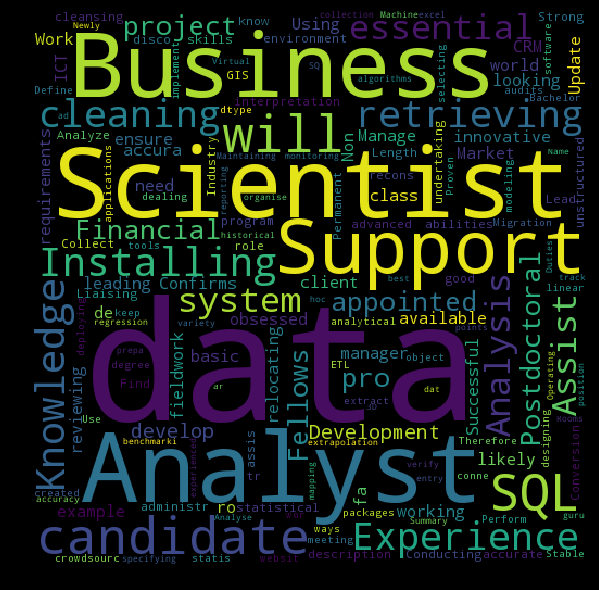

In [448]:
clickwords_wc = WordCloud(width=512, height=512, relative_scaling=0.5, max_words=250, collocations=False).generate(str(dft['description']))
plt.figure(figsize = (10,8), facecolor='k')
plt.imshow(clickwords_wc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

<div class="alert alert-block alert-info">
Even with salaries converted into common currency, the basis for comparison across countries is still not entirely fair, because of variations in the standards of living. A way to standardize this would be to scale the salaries for a given city based on a cost of living index. I have added in the Numbeo cost of living index numbers. 
</div>

In [622]:
numbeo = pd.read_csv('./data/numbeo.csv')
numbeo.head(10)

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1.0,Bermuda,150.38,109.10,130.06,149.89,151.90,87.25
1,2.0,Switzerland,138.16,56.01,97.72,145.50,132.81,114.60
2,3.0,Iceland,130.79,53.62,92.79,127.65,140.48,68.80
3,4.0,Norway,112.75,39.53,76.70,108.35,124.05,92.20
4,5.0,Bahamas,109.37,37.55,74.01,109.34,94.59,50.21
5,6.0,Denmark,93.27,37.55,65.83,74.12,113.18,98.67
6,7.0,Us Virgin Islands,93.06,48.83,71.28,91.32,81.82,70.68
7,8.0,Japan,89.50,25.56,58.02,97.32,49.61,92.48
8,9.0,Israel,88.56,34.08,61.74,76.08,96.06,92.26
9,10.0,Singapore,88.07,66.99,77.69,81.34,61.40,88.14


In [624]:
citylist = 'Singapore|Melbourne, Australia|Sydney|Brisbane|Perth|Kuala Lumpur|London, United Kingdom|New York|Chicago|\
San Francisco|Austin|Seattle|Los Angeles|Philadelphia|Atlanta|Dallas|Houston|Newcastle Upon|Sheffield|Bristol|\
Manchester, United Kingdom|Glasgow|Edinburgh|Birmingham, United Kingdom|Liverpool|Aberdeen|Nottingham|Belfast|Cardiff|\
Cambridge|Oxford|Toronto|Montreal|Vancouver, Canada|Quebec'

countrylist = 'Singapore|Australia|Malaysia|United Kingdom|Canada|United States'

# Decided to go by countries instead of cities because the dataframe has too many unique cities that came up when scraping
numb = numbeo[numbeo['Country'].str.contains(countrylist)==True]
numb.reset_index(drop=True, inplace=True)

In [627]:
# Creates a dictionary of countries to append the cost of living adjustment factor 
ctry_dict = dict(zip(numb['Country'],numb['Cost of Living Index']))

In [628]:
ctry_dict

{'Australia': 85.959999999999994,
 'Canada': 72.819999999999993,
 'Malaysia': 43.310000000000002,
 'Singapore': 88.069999999999993,
 'United Kingdom': 76.019999999999996,
 'United States': 77.230000000000004}

In [641]:
dft['ctry_adj_factor'] = dft['country'].apply(lambda x: ctry_dict[x])

In [1012]:
# Calculates adjusted salary based on cost of living in each country. We now have a true, fair comparison of salaries.
dft['adj_avg_sal'] = (1./(dft['ctry_adj_factor']/100.))*dft['avg_salary']

In [754]:
# calculate median and create feature with 1 as high salary
dft['high_sal'] = dft['adj_avg_sal'].apply(lambda x: 1 if x > dft['adj_avg_sal'].median() else 0)
print 'median salary:', dft['adj_avg_sal'].median()

median salary: 69296.7723008


### How is this different compared to the unadjusted figures?

In [1014]:
dft['adj_avg_sal'].describe()

count      4343.000000
mean      80770.643181
std       42989.967337
min       10001.119459
25%       51882.961890
50%       69296.772301
75%       97902.134239
max      323708.403470
Name: adj_avg_sal, dtype: float64

In [1013]:
dft['avg_salary'].describe()

count      4343.000000
mean      62392.303462
std       33584.175029
min        7077.975699
25%       39509.554727
50%       52679.406303
75%       76661.569570
max      250000.000000
Name: avg_salary, dtype: float64

In [1015]:
# Calculate baseline for classification
dft['high_sal'].values.sum() / float(len(dft['high_sal']))

0.49044439327653694

In [755]:
dft

,company,country,description,location,review,salary,star,title,min_sal,avg_sal,max_sal,avg_salary,max_salary,min_salary,ctry_adj_factor,adj_avg_sal,high_sal
0,UMeKang,Singapore,"Use all available data, undertaking data disco...",Singapore,0.0,"$9,000 - $11,000 a month",0.0,Data Scientist,108000.0,120000.0,132000.0,88079.859072,96887.844979,79271.873165,88.07,100011.194586,1
1,Cresco Data Pte Ltd,Singapore,Data Scientist Duties:. We are looking for a D...,Tanjong Pagar,0.0,"$3,500 - $4,500 a month",0.0,Data Scientist,42000.0,48000.0,54000.0,35231.943629,39635.936583,30827.950675,88.07,40004.477835,0
2,iKas International (Asia) Pte Ltd,Singapore,"Using data modeling, linear regression, statis...",Singapore,0.0,"$7,000 - $9,000 a month",0.0,Data Scientist,84000.0,96000.0,108000.0,70463.887258,79271.873165,61655.901351,88.07,80008.955669,1
3,Vault Dragon,Singapore,Assist the Data Scientist in deploying Machine...,Singapore,0.0,"$4,000 - $6,000 a month",0.0,Data Engineer,48000.0,60000.0,72000.0,44039.929536,52847.915443,35231.943629,88.07,50005.597293,0
4,TSA Solutions,Singapore,Data Scientist - Summary*. Bachelor in degree ...,Pasir Panjang,0.0,"$4,200 a month",0.0,Data Scientist,50400.0,50400.0,50400.0,36993.540810,36993.540810,36993.540810,88.07,42004.701726,0
5,EkkBaz.com,Singapore,We are looking for a Data Scientist that will ...,Ang Mo Kio,0.0,"$1,000 - $2,000 a month",0.0,Data Scientist Intern,12000.0,18000.0,24000.0,13211.978861,17615.971814,8807.985907,88.07,15001.679188,0
6,6Estates Pte Ltd,Singapore,Assist to organise unstructured data on websit...,Singapore,0.0,"$1,000 a month",0.0,Data Crawling Engineer Intern,12000.0,12000.0,12000.0,8807.985907,8807.985907,8807.985907,88.07,10001.119459,0
7,Transforma,Singapore,Develop and implement algorithms for 3D recons...,Singapore,0.0,"$3,500 - $5,500 a month",0.0,Robot Software Engineer - Image Processing,42000.0,54000.0,66000.0,39635.936583,48443.922490,30827.950675,88.07,45005.037564,0
8,Shentilium Technologies,Singapore,"Perform ETL, data cleaning and data crowdsourc...",Singapore,0.0,"$1,000 a month",0.0,Data Visualization and Wrangling Intern,12000.0,12000.0,12000.0,8807.985907,8807.985907,8807.985907,88.07,10001.119459,0
9,TSA Solutions,Singapore,Knowledge of SQL for retrieving data. Support ...,Singapore,0.0,"$3,000 - $4,300 a month",0.0,Data Analyst,36000.0,43800.0,51600.0,32149.148561,37874.339401,26423.957722,88.07,36504.086024,0


In [1016]:
dft['title'].value_counts()

Data Analyst                                                                             156
Data Scientist                                                                           119
Business Analyst                                                                          82
Senior Data Scientist                                                                     24
Financial Analyst                                                                         22
Analyst                                                                                   19
Finance Analyst                                                                           19
Reporting Analyst                                                                         16
Data Engineer                                                                             16
Business Intelligence Analyst                                                             15
Insight Analyst                                                       

## Too many job titles... will be focusing on the top 20

In [756]:
# Extract counts of top 20 features from job descriptions
descVectorizer = CountVectorizer(max_features=20,stop_words="english")
descVectorizer.fit(dft['description'])

descCol = [x + '_desc' for x in descVectorizer.get_feature_names()]

descVectorDF  = pd.DataFrame(descVectorizer.transform(dft['description']).todense(),
              columns=descCol)

# Extract counts of top 20 features from job titles
titleVectorizer = CountVectorizer(max_features=20,stop_words="english")
titleVectorizer.fit(dft['title'])

titleCol = [x + '_title' for x in titleVectorizer.get_feature_names()]

titleVectorDF  = pd.DataFrame(titleVectorizer.transform(dft['title']).todense(),
              columns=titleCol)

# Consolidate
dft_consol = dft.copy()
dft_consol = pd.concat([dft_consol.reset_index(drop=True), descVectorDF, titleVectorDF], axis=1)

In [937]:
dft_consol.columns

Index([        u'company',         u'country',     u'description',
              u'location',          u'review',          u'salary',
                  u'star',           u'title',         u'min_sal',
               u'avg_sal',         u'max_sal',      u'avg_salary',
            u'max_salary',      u'min_salary', u'ctry_adj_factor',
           u'adj_avg_sal',        u'high_sal',   u'analysis_desc',
          u'analyst_desc',   u'business_desc',     u'client_desc',
             u'data_desc', u'experience_desc',       u'join_desc',
          u'looking_desc', u'management_desc',       u'read_desc',
         u'research_desc',       u'role_desc',  u'scientist_desc',
       u'scientists_desc',     u'senior_desc',        u'sql_desc',
          u'support_desc',       u'team_desc',       u'work_desc',
          u'working_desc',   u'analyst_title', u'analytics_title',
        u'business_title',      u'data_title', u'developer_title',
        u'engineer_title', u'financial_title',  u'graduate_tit

In [758]:
predictors = dft_consol.drop(['company','description','location','review','star','salary','title','min_sal','avg_sal',\
                              'max_sal','min_salary','avg_salary','max_salary','ctry_adj_factor','adj_avg_sal',\
                             'high_sal'],axis=1)


In [1018]:
# Get X and y for model
X = pd.get_dummies(predictors)
y = dft['high_sal']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=8)

In [840]:
def model_summary(model, X, y):
    '''function to print out regression results'''
    
    cv = StratifiedKFold(shuffle=True, n_splits=5)
    scores = cross_val_score(model, X, y, cv=cv)
    print 'mean cross-val accuracy score: ', scores.mean(), "+/-", scores.std()
    
    y_pred = cross_val_predict(model, X, y, cv=cv)
   
    print classification_report(y, y_pred)
    
    y_score = cross_val_predict(model, X, y, method='predict_proba')[:,1]
    fpr, tpr, thresholds = roc_curve(y, y_score)
    print 'AUC:', auc(fpr, tpr)

In [842]:
model_summary(LogisticRegressionCV(), X2, y)

mean cross-val accuracy score:  0.768362650008 +/- 0.0145486562943
             precision    recall  f1-score   support

          0       0.75      0.80      0.77      2213
          1       0.77      0.73      0.75      2130

avg / total       0.76      0.76      0.76      4343

AUC: 0.726729589769


In [843]:
model_summary(DecisionTreeClassifier(), X2, y)

mean cross-val accuracy score:  0.753166413007 +/- 0.0107594330828
             precision    recall  f1-score   support

          0       0.74      0.80      0.77      2213
          1       0.77      0.70      0.73      2130

avg / total       0.75      0.75      0.75      4343

AUC: 0.637203125365


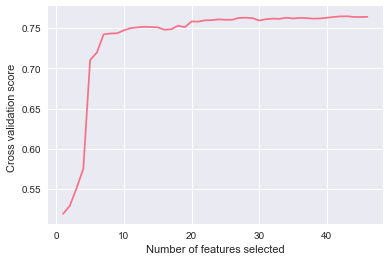

In [1019]:
# Use RFECV for feature extraction
cv = KFold(shuffle=True, n_splits=10)
rfecv = RFECV(LogisticRegression(), cv=cv)
rfecv.fit(X, y)
cols = rfecv.get_support()
X2 = X[X.columns[cols]]

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score ")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [845]:
log_regCV = LogisticRegressionCV()
log_regCV.fit(X2, y)

features = list(X2.columns.values)
features.append('intercept')

coefficients = list(log_regCV.coef_[0,:].round(3))
coefficients.append(log_regCV.intercept_[0])

df = pd.DataFrame({'features' : features, 
                   'coefficients': coefficients})

df.sort_values('coefficients', ascending=False)

,coefficients,features
35,1.01800,country_United States
25,0.87500,senior_title
30,0.83100,country_Australia
19,0.64700,learning_title
20,0.62000,machine_title
24,0.56300,scientist_title
21,0.52400,manager_title
13,0.50100,analytics_title
16,0.49900,engineer_title
7,0.49700,scientist_desc


<div class="alert alert-block alert-info">
<h2> Broad Conclusions</h2>
<ul> As a job seeker it is better to be based in the US and Australia. Surprisingly, UK does not fall into the 'desired' country list </ul>
<ul> Job titles with the words 'senior', 'manager', 'scientist' and 'machine' are the most predictive for high salary jobs </ul>
<ul> On the lower end of the spectrum, the words 'analyst' and 'graduate' stand out</ul>
<ul> SQL seems to be a major requirement for many of these jobs</ul>
</div>

### The above approach using CountVectorizer broke down the job titles into individual words. But what if we are more interested in the term 'Data Scientist' for the title?

In [1021]:
mask = dft_consol['title'].str.contains('Data Scientist')
dft_consol['true_ds'] = mask.astype(int)
dft_consol['true_ds'].value_counts()

0    3997
1     346
Name: true_ds, dtype: int64

### Can I use the terms given by CountVectorizer in job descriptions to predict whether a position is a true blue Data Scientist job?

In [998]:
y_new = dft_consol['true_ds']

In [1022]:
# Removing country column so the model only uses text features
new_predictor = predictors.drop(['country','analyst_title','analytics_title', 'business_title','data_title',
       'developer_title', 'engineer_title', 'financial_title',
       'graduate_title', 'learning_title', 'machine_title',
       'manager_title', 'research_title', 'risk_title', 'sas_title',
       'scientist_title', 'senior_title', 'software_title', 'sql_title',
       'support_title', 'systems_title'], axis=1)

In [1023]:
new_predictor.columns

Index([u'analysis_desc', u'analyst_desc', u'business_desc', u'client_desc',
       u'data_desc', u'experience_desc', u'join_desc', u'looking_desc',
       u'management_desc', u'read_desc', u'research_desc', u'role_desc',
       u'scientist_desc', u'scientists_desc', u'senior_desc', u'sql_desc',
       u'support_desc', u'team_desc', u'work_desc', u'working_desc'],
      dtype='object')

In [1024]:
Xtr, Xte, ytr, yte = train_test_split(new_predictor, y_new, train_size=0.7, random_state=10)

In [1025]:
newlog = LogisticRegression()
newlog.fit(Xtr, ytr)
newlog.score(Xte,yte)

model_summary(LogisticRegressionCV(), new_predictor, y_new)

mean cross-val accuracy score:  0.926775800902 +/- 0.00407988498652
             precision    recall  f1-score   support

          0       0.93      0.99      0.96      3997
          1       0.64      0.18      0.28       346

avg / total       0.91      0.93      0.91      4343

AUC: 0.851677775673


### Not bad, but remember that dataset is imbalanced! Try to use SMOTE to handle it

In [1026]:
from imblearn import over_sampling as os
from imblearn import pipeline as pl
from imblearn.metrics import classification_report_imbalanced

RANDOM_STATE = 42

pipeline = pl.make_pipeline(os.SMOTE(random_state=RANDOM_STATE),
                            LinearSVC(random_state=RANDOM_STATE))

Xtr2, Xte2, ytr2, yte2 = train_test_split(new_predictor, y_new, random_state=RANDOM_STATE)

pipeline.fit(Xtr2, ytr2)

y_new_pred_bal = pipeline.predict(Xte2)

In [1028]:
print(classification_report(yte2, y_new_pred_bal))
                            

             precision    recall  f1-score   support

          0       0.97      0.80      0.88      1007
          1       0.22      0.71      0.33        79

avg / total       0.92      0.79      0.84      1086



### Improvement in F1-score but most notably precision is affected